<a href="https://colab.research.google.com/github/shivanig151/Vaccine-Hesitancy-STIP/blob/main/Vaccine_Hesitancy_%26_Risk_Factors_STIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install covidcast

In [ ]:
from datetime import date
import covidcast

data = covidcast.signal("fb-survey", "smoothed_covid_vaccinated_or_accept",date(2020, 12, 20), date(2021, 6, 8),
                        "county")

In [ ]:
data.head()

,geo_value,signal,time_value,issue,lag,value,stderr,sample_size,geo_type,data_source
0,01000,smoothed_covid_vaccinated_or_accept,2020-12-20,2020-12-21,1,64.399050,2.014393,565.0054,county,fb-survey
1,02000,smoothed_covid_vaccinated_or_accept,2020-12-20,2020-12-21,1,67.307692,4.130097,129.0000,county,fb-survey
2,04000,smoothed_covid_vaccinated_or_accept,2020-12-20,2020-12-21,1,61.476945,3.698210,173.1609,county,fb-survey
3,04013,smoothed_covid_vaccinated_or_accept,2020-12-20,2020-12-21,1,67.878382,2.461543,359.8439,county,fb-survey
4,04019,smoothed_covid_vaccinated_or_accept,2020-12-20,2020-12-21,1,73.637865,3.257229,182.9722,county,fb-survey


In [ ]:
import pandas as pd
#Number of counties in dataset -> 768
n = len(pd.unique(data['geo_value']))
origdata = data
print(data)

   geo_value                               signal  ... geo_type data_source
0      01000  smoothed_covid_vaccinated_or_accept  ...   county   fb-survey
1      02000  smoothed_covid_vaccinated_or_accept  ...   county   fb-survey
2      04000  smoothed_covid_vaccinated_or_accept  ...   county   fb-survey
3      04013  smoothed_covid_vaccinated_or_accept  ...   county   fb-survey
4      04019  smoothed_covid_vaccinated_or_accept  ...   county   fb-survey
..       ...                                  ...  ...      ...         ...
35     48000  smoothed_covid_vaccinated_or_accept  ...   county   fb-survey
36     49000  smoothed_covid_vaccinated_or_accept  ...   county   fb-survey
37     51000  smoothed_covid_vaccinated_or_accept  ...   county   fb-survey
38     53000  smoothed_covid_vaccinated_or_accept  ...   county   fb-survey
39     55000  smoothed_covid_vaccinated_or_accept  ...   county   fb-survey

[89954 rows x 10 columns]


In [ ]:
data = origdata

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89954 entries, 0 to 39
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   geo_value    89954 non-null  object        
 1   signal       89954 non-null  object        
 2   time_value   89954 non-null  datetime64[ns]
 3   issue        89954 non-null  datetime64[ns]
 4   lag          89954 non-null  int64         
 5   value        89954 non-null  float64       
 6   stderr       89954 non-null  float64       
 7   sample_size  89954 non-null  float64       
 8   geo_type     89954 non-null  object        
 9   data_source  89954 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 7.5+ MB


In [ ]:
data = data.drop(columns = ['signal', 'lag','geo_type', 'data_source'])

In [ ]:
data = data.drop(columns = ['stderr', 'sample_size'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89954 entries, 0 to 39
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   geo_value    89954 non-null  object        
 1   time_value   89954 non-null  datetime64[ns]
 2   issue        89954 non-null  datetime64[ns]
 3   value        89954 non-null  float64       
 4   stderr       89954 non-null  float64       
 5   sample_size  89954 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(1)
memory usage: 4.8+ MB


In [ ]:
#Separating data based on county
df1 = data.set_index([data['geo_value'],data.groupby('geo_value').cumcount()]).drop('geo_value',1).unstack(0)
df1.columns = [f'{y}_{x}' for x,y in df1.columns]
print(df1)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 0 to 170
Columns: 2304 entries, ('time_value', '01000') to ('value', '56025')
dtypes: datetime64[ns](1536), float64(768)
memory usage: 3.0 MB


In [ ]:
print (df1)

          time_value                        ...      value                      
geo_value      01000      01003      01015  ...      56000      56021      56025
0         2020-12-20 2020-12-22 2021-01-05  ...  52.318524  63.333333  56.721355
1         2020-12-21 2020-12-23 2021-01-06  ...  54.362461  64.728682  58.038015
2         2020-12-22 2020-12-24 2021-01-07  ...  58.252091  64.682540  58.770159
3         2020-12-23 2020-12-25 2021-01-08  ...  57.793773  69.921875  58.246391
4         2020-12-24 2020-12-26 2021-01-09  ...  58.830484  67.524064  56.345384
..               ...        ...        ...  ...        ...        ...        ...
166       2021-06-04        NaT        NaT  ...        NaN        NaN        NaN
167       2021-06-05        NaT        NaT  ...        NaN        NaN        NaN
168       2021-06-06        NaT        NaT  ...        NaN        NaN        NaN
169       2021-06-07        NaT        NaT  ...        NaN        NaN        NaN
170       2021-06-08        

In [ ]:
print(df1['56021_value'].isnull().sum())

49


In [ ]:
print(data)

time_value  issue     
2020-12-20  2020-12-21          NaN
2020-12-21  2020-12-22    85.359466
2020-12-22  2020-12-23    83.186106
2020-12-23  2020-12-24    84.908429
2020-12-24  2020-12-25    85.629537
                            ...    
2021-06-04  2021-06-09          NaN
2021-06-05  2021-06-09          NaN
2021-06-06  2021-06-09          NaN
2021-06-07  2021-06-09          NaN
2021-06-08  2021-06-09          NaN
Name: 51059, Length: 174, dtype: float64


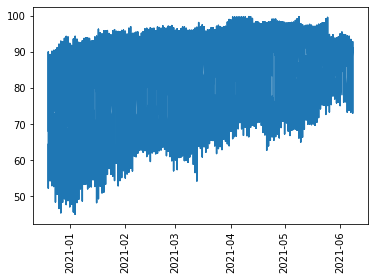

In [ ]:
import matplotlib.pyplot as plt
datacopy = data.sort_values('time_value', ascending = True)
plt.plot(datacopy['time_value'], datacopy['value'])
plt.xticks(rotation='vertical')
plt.show()